In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colorbar import Colorbar
from matplotlib import colors
from scipy import special
from mycolorpy import colorlist as mcp
from pathlib import Path



params = {'font.family' : 'lmodern'}
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams.update(params)

In [2]:
cwd = Path().resolve()
project_root = cwd.parent

data_equilibrium_dir = project_root / "data" / "equilibrium"
data_quench_dir = project_root / "data" / "quench"
plot_dir = project_root / "plot"

In [4]:
def comparison_data_entropy_at_equilibrium_with_various_coeff():
    Entr1 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Entr2 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k08.txt")
    Entr3 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k09.txt")
    Entr4 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic_k095.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_title(r"Entropy vs $N_A$ at equilibrium in the thermodynamic limit", fontsize=20)

    ax1.scatter(xvals, Entr1, color="red", marker='o', label=r"$w/v = 0.70$")
    ax1.scatter(xvals, Entr2, color="orange", marker='o', label=r"$w/v = 0.8$")
    ax1.scatter(xvals, Entr3, color="green", marker='o', label=r"$w/v = 0.9$")
    ax1.scatter(xvals, Entr4, color="blue", marker='o', label=r"$w/v = 0.95$")
    ax1.set_xlabel(r"$N_A$", fontsize=15, color="black")
    ax1.set_ylabel(r"$S$", fontsize=15, color="black")

    ax1.tick_params(direction="in", labelsize=15)

    ax1.legend(loc='best', fontsize=10)

    plt.show()

    fig.savefig(plot_dir/"entropy_vs_NA_equilibrium_thermodynamic_limit.pdf", bbox_inches='tight')

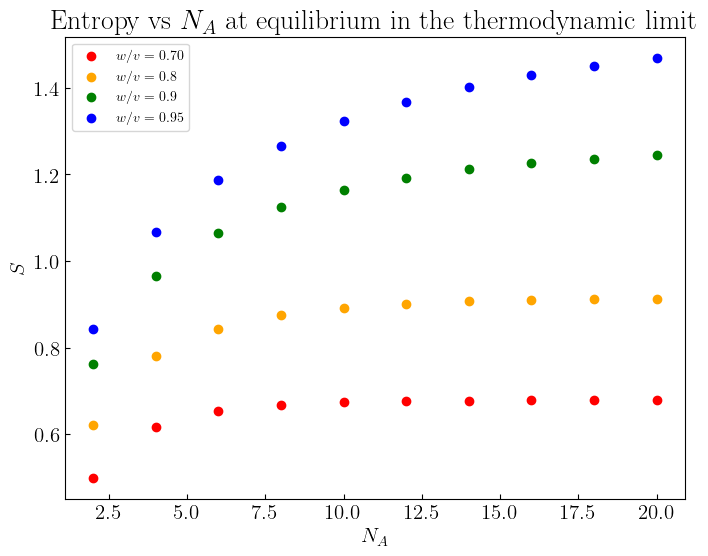

In [5]:
comparison_data_entropy_at_equilibrium_with_various_coeff()

In [217]:
def comparison_data_entropy_vs_var_equilibrium_thermo():
    Entr1 = np.loadtxt(data_equilibrium_dir/"entropy_10_cells_thermodynamic.txt")
    Var = np.loadtxt(data_equilibrium_dir/"variance_10_cells_thermodynamic.txt")
    xvals = np.arange(2, 22, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=100)
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the thermodynamic limit", fontsize=20)
    
    ax1.scatter(xvals, Entr1, color="red", marker='o')
    ax2.scatter(xvals, Var, color="blue", marker='o')


    ax1.set_ylabel(r"$S$", fontsize=20, color="black")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")
    ax1.set_xlabel(r"$N_{A}$", fontsize=20)

    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_variance_equilibrium_thermolimit.pdf", bbox_inches = 'tight')


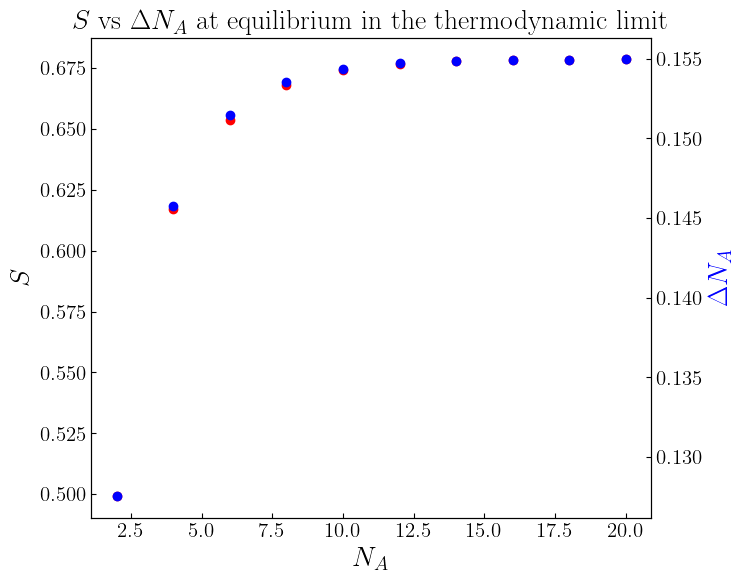

In [218]:
comparison_data_entropy_vs_var_equilibrium_thermo()

In [219]:
def comparison_entropy_thermo_equilibrium_one_cell_various_hop_coeff():
    w = np.linspace(0.400, 2.000, int(round((2.000 - 0.400)/0.01)) + 1)
    entropy = np.loadtxt(data_equilibrium_dir/"entropy_1_cell_thermodynamic_comparison_hop_coeff.txt")

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.plot(w, entropy, color='blue')
    ax.set_title(r"Entropy of one cell at equilibrium vs hop coefficient", fontsize=20)
    ax.set_xlabel(r"$w$", fontsize=20)
    ax.set_ylabel(r"$S$", fontsize=20)
    ax.tick_params(direction="in", labelsize=15)

    plt.show()
    fig.savefig(plot_dir/"entropy_vs_hop_coeff_equilibrium.pdf", bbox_inches='tight')

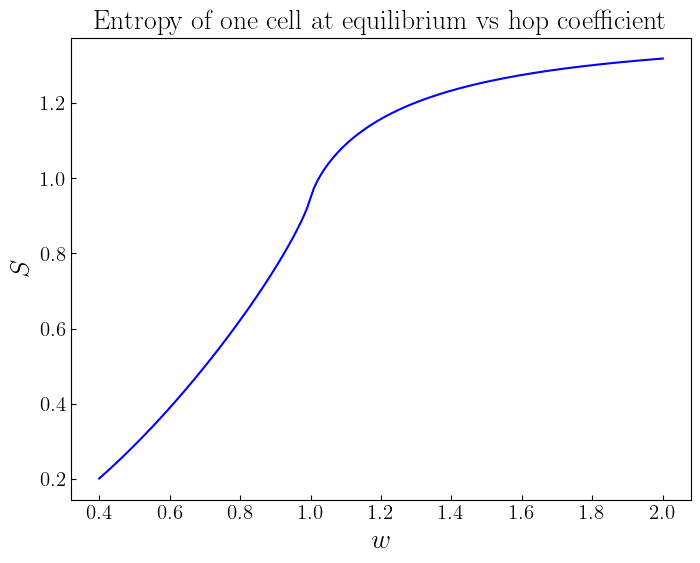

In [220]:
comparison_entropy_thermo_equilibrium_one_cell_various_hop_coeff()

In [221]:
def comparison_data_entropy_equilibrium_with_various_hop_coefficients():
    coeffs = [0.5, 0.6, 0.9, 0.95, 0.98]
    colors = ["red", "orange", "green", "blue", "purple"]

    xvals = np.arange(2, 202, 2)

    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.set_title(r"Entropy vs $N_A$ at equilibrium with various hop coefficients", fontsize=20)

    for w, color in zip(coeffs, colors):
        data = np.loadtxt(data_equilibrium_dir / f"entropy_200_cells_noflux_k{w}.txt")
        ax1.scatter(xvals, data, color=color, marker="o", s=7, label=fr"$w/v = {w}$")

    ax1.set_xlabel(r"$N_A$", fontsize=15, color="black")
    ax1.set_ylabel(r"$S$", fontsize=15, color="black")
    ax1.tick_params(direction="in", labelsize=15)
    ax1.legend(loc="center", fontsize=12, bbox_to_anchor=(0.5, 0.35), ncol=3)

    plt.show()
    fig.savefig(plot_dir / "entropy_vs_NA_equilibrium_various_hop_coeff.pdf", bbox_inches="tight")

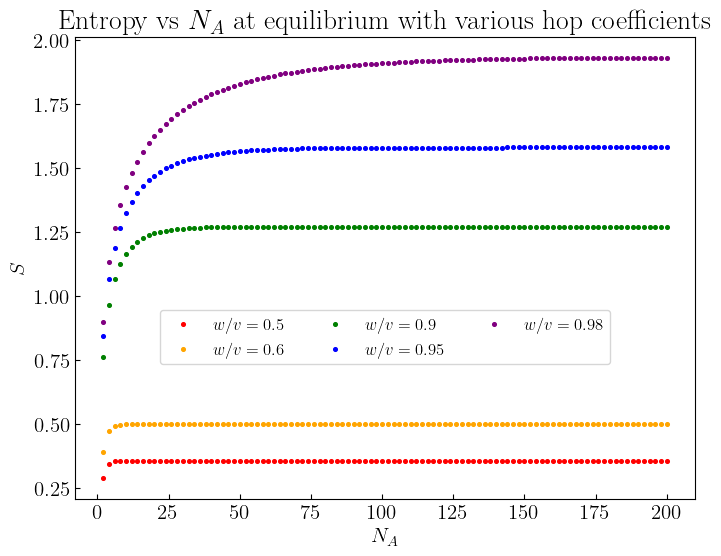

In [222]:
comparison_data_entropy_equilibrium_with_various_hop_coefficients()

In [223]:
def comparison_data_entropy_vs_var_equilibrium_finite():
    # Load data
    Entr = np.loadtxt(data_equilibrium_dir / "entropy_200_cells_noflux_k0.7.txt")
    Var = np.loadtxt(data_equilibrium_dir / "variance_200_cells_noflux_k0.7.txt")
    xvals = np.arange(2, 202, 2)

    # Figure and grid spec
    fig = plt.figure(figsize=(10, 15), dpi=100)
    spec = gridspec.GridSpec(ncols=1, nrows=2, hspace=0)

    # ---------- Top subplot ----------
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = ax1.twinx()  # Twin y-axis for variance

    # Plot data
    ax1.scatter(xvals, Entr, color="orange", s=10)
    ax2.scatter(xvals, Var, color="blue", s=10)

    # Labels and title
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ at equilibrium in the finite system", fontsize=20)
    ax1.set_ylabel(r"$S$", fontsize=20, color="orange")
    ax2.set_ylabel(r"$\Delta N_{A}$", fontsize=20, color="blue")

    # Styling
    ax1.tick_params(direction="in", labelsize=15)
    ax2.tick_params(direction="in", labelsize=15)
    ax1.text(70, 0.530, r"$v_{i} = 1, w_{i} = 0.7, N = 400$", fontsize=15)

    # ---------- Shared x-axis inside top subplot ----------
    tick_pad = -15    # adjust tick label position inside plot
    label_coords = (1.05, 0.02)  # x-axis label position (right & slightly inside)
    ax1.xaxis.set_label_position('bottom')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_xlabel(r"$N_A$", fontsize=20)
    ax1.xaxis.set_label_coords(*label_coords)
    ax1.tick_params(axis='x', which='both', direction='in', labelsize=15, pad=tick_pad)

    # ---------- Bottom subplot ----------
    ax3 = fig.add_subplot(spec[1, 0], sharex=ax1)
    ax3.plot(xvals, Entr / Var, color="green")
    ax3.set_ylabel(r"$S/\Delta N_{A}$", fontsize=20)
    # Remove x-axis ticks and labels
    ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False, direction="in", labelsize=15)

    # ---------- Layout ----------
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    # Show and save
    plt.show()
    fig.savefig(plot_dir / "entropy_vs_variance_equilibrium_discrete.pdf", bbox_inches='tight')


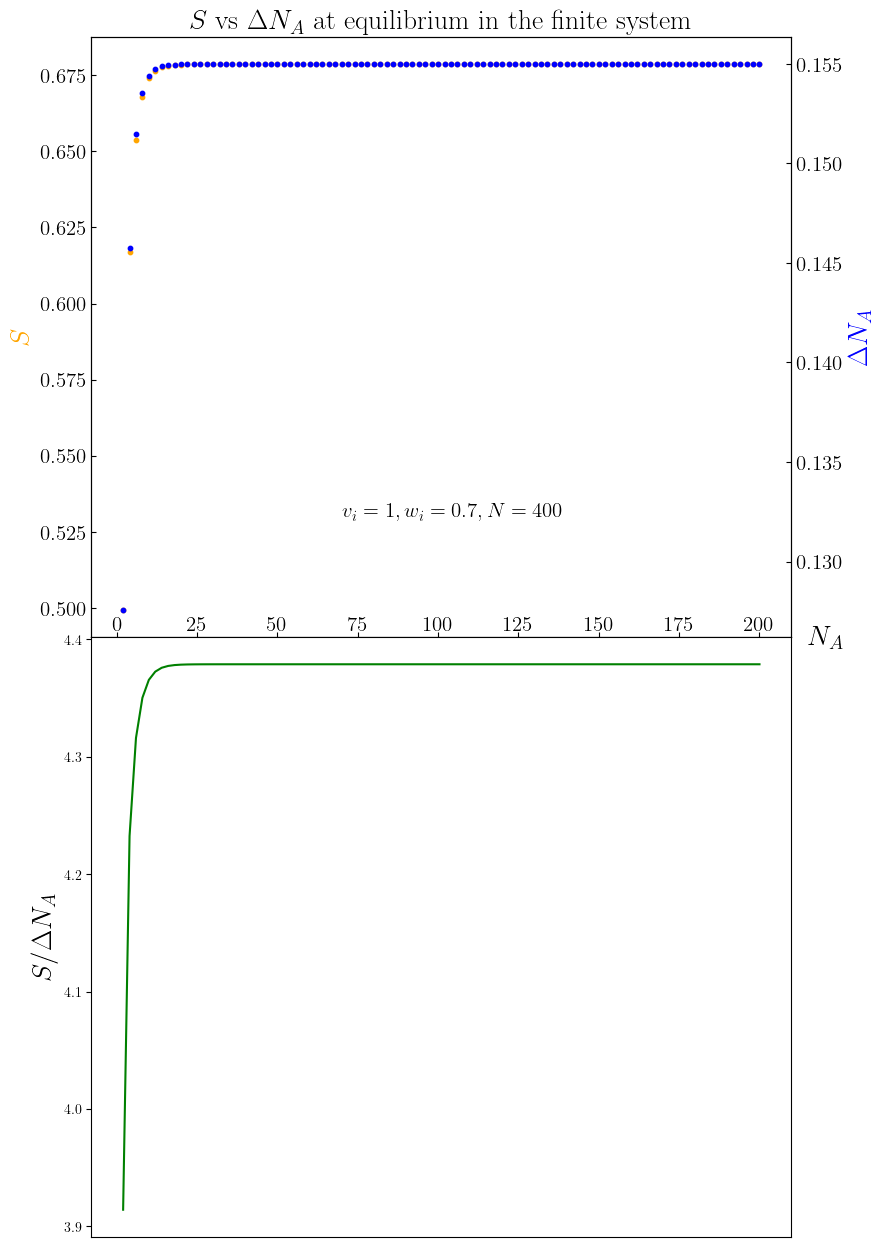

In [224]:
comparison_data_entropy_vs_var_equilibrium_finite()

In [250]:
def plot_entropy_variance_ratio_for_different_hop_coefficients():
    coeffs = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
    colors = ["red", "orange", "yellow", "green", "blue", "purple", "brown", "pink", "gray", "cyan"]
    xvals = np.arange(2, 202, 2)
    y_const = (np.pi**2)/3  # Constant line for comparison

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$S/\Delta N_{A}$ vs $N_A$ at equilibrium with various hop coefficients", fontsize=20)

    for w, color in zip(coeffs, colors):
        entropy = np.loadtxt(data_equilibrium_dir / f"entropy_200_cells_noflux_k{w}.txt")
        variance = np.loadtxt(data_equilibrium_dir / f"variance_200_cells_noflux_k{w}.txt")
        ratio = entropy / variance
        ax.plot(xvals, ratio, color=color, label=fr"$w/v = {w}$")
    ax.plot(xvals, np.full_like(xvals, y_const, dtype=float), ls="--", label=fr"$\pi^2/3 \approx {y_const:.2f}$")
    
    ax.set_xlabel(r"$N_A$", fontsize=15)
    ax.set_ylabel(r"$S/\Delta N_{A}$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.legend(loc="center", fontsize=12, bbox_to_anchor=(1.15, 0.5), ncol=1)

    plt.show()
    fig.savefig(plot_dir / "entropy_variance_ratio_vs_NA_equilibrium_various_hop_coeff.pdf", bbox_inches="tight")

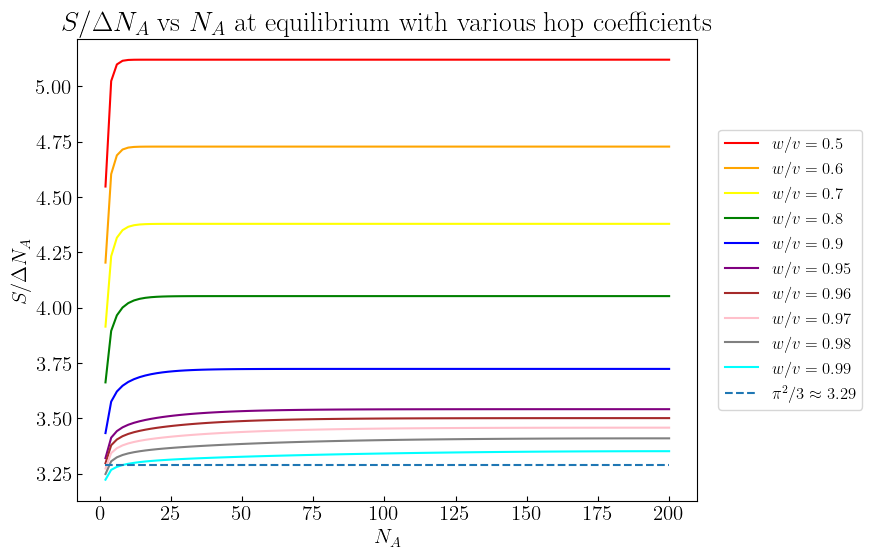

In [251]:
plot_entropy_variance_ratio_for_different_hop_coefficients()

In [227]:
def plot_correlation_data_as_distance_increase():
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$ as a function of $l = j-j'$", fontsize=15)
    xvals = np.arange(0, 51, 1)

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.plot(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    ax.legend(loc="upper right", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)
    ax.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance.pdf", bbox_inches = 'tight')

In [245]:
def plot_correlation_data_as_distance_increase_semilogy():

    xvals = np.arange(0, 51, 1)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$ as a function of $l = j-j'$", fontsize=15)
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.semilogy(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    
    ax.legend(loc="best", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance_semilogy.pdf", bbox_inches = 'tight')

In [246]:
def plot_correlation_data_as_distance_increase_loglogy():

    xvals = np.arange(0, 51, 1)
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$ as a function of $l = j-j'$", fontsize=15)
    coefficients = [0.5, 0.9, 0.99, 0.995, 0.998]
    colors = list(mcp.gen_color(cmap="viridis", n=len(coefficients)))

    for w, color in zip(coefficients, colors):
        correlation_list = np.loadtxt(data_equilibrium_dir / f"correlation_k={round(w,3)}_noflux.txt")
        ax.loglog(xvals, correlation_list, color=color, lw=0.3, marker='o', markersize=3, label=fr"$w/v = {w}$")
    
    
    ax.legend(loc="best", fontsize=15)
    ax.set_xlabel(r"$l$", fontsize=15)
    ax.set_ylabel(r"$\langle c_{j,A}^\dagger c_{j',B} \rangle$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)

    # Better manual layout control
    plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.15)

    plt.show()
    fig.savefig(plot_dir/"correlation_vs_distance_loglog.pdf", bbox_inches = 'tight')

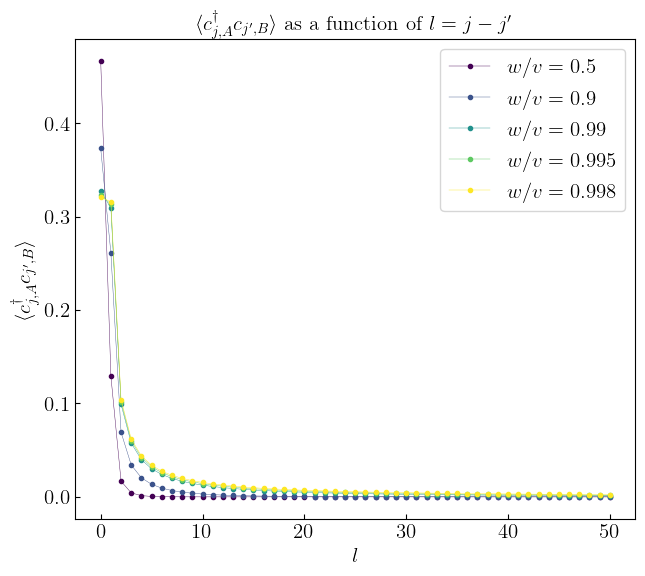

In [247]:
plot_correlation_data_as_distance_increase()

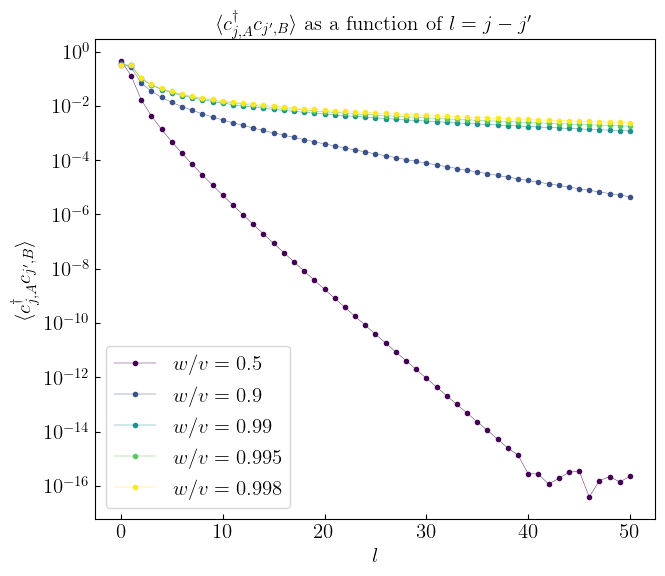

In [248]:
plot_correlation_data_as_distance_increase_semilogy()

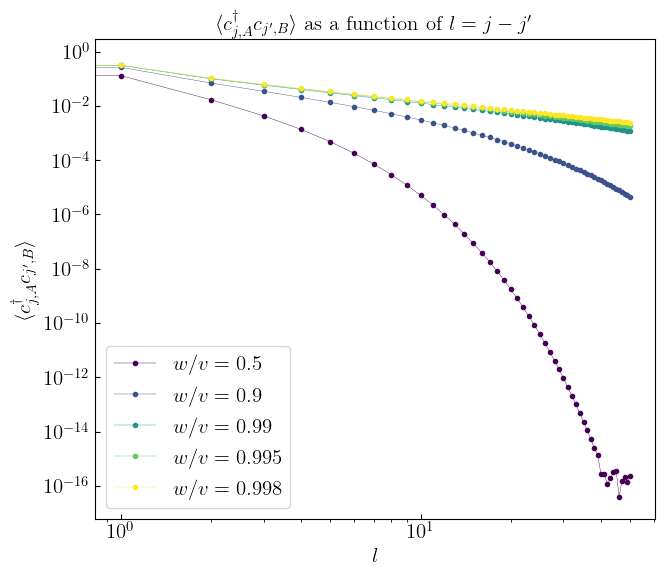

In [249]:
plot_correlation_data_as_distance_increase_loglogy()

In [ ]:
def plot_ratio_entropy_variance_ssh_and_rm():
    gap = 10 ** np.linspace(-4, -1, 20)
    ratio_ssh = np.loadtxt(data_equilibrium_dir / "ratio_entropy_variance_vs_gap_ssh_400cells.txt")
    ratio_rm  = np.loadtxt(data_equilibrium_dir / "ratio_entropy_variance_vs_gap_rm_1e-4_half_filling_5000cells.txt")
    y_fit_ssh = (np.pi**2)/3 - 0.473147/np.log(300) + 1.892823/(np.log(300) **2)
    y_fit_rm = (np.pi**2)/3 - 0.276997/np.log(300) + 0.378744/(np.log(300) **2)

    y = (np.pi**2)/3

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Main curves
    ax.semilogx(gap, ratio_ssh, color="blue", marker='o', markersize=3, label="SSH Model")
    ax.semilogx(gap, ratio_rm, color="red", marker='o', markersize=3, label="R–M Model")
    #ax.semilogx(gap, ratio_rm, color="red", marker='o', markersize=3, label="R–M Model")
    ax.axhline(y, color="green", ls="--", label=r"$\pi^2/3 \approx 3.29$")
    ax.axhline(y_fit_ssh, color="orange", ls="--", label="value with finite size correction at N=300 ssh")
    ax.axhline(y_fit_rm, color="purple", ls="--", label="value with finite size correction at N=300 rm")

    # Labels & title
    ax.set_title(r"$S / \Delta N_{A}$ vs Gap - half filling", fontsize=20)
    ax.set_xlabel(r"Gap", fontsize=15)
    ax.set_ylabel(r"$S / \Delta N_{A}$", fontsize=15)

    # Fine grid (major + minor)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax.minorticks_on()

    # Tick formatting
    ax.tick_params(direction="in", which='both', labelsize=13)
    ax.legend(loc="best", fontsize=12)

    # Save + show
    fig.tight_layout()
    plt.show()
    fig.savefig(plot_dir / "ratio_entropy_over_variance/ratio_entropy_variance_vs_gap_ssh_and_rm_1e-4_half_filling.pdf",
                bbox_inches='tight')

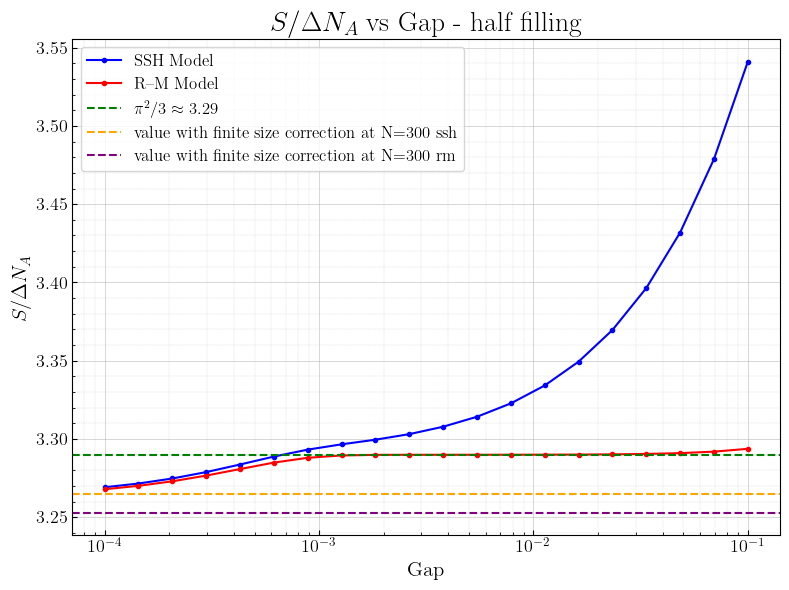

In [4]:
plot_ratio_entropy_variance_ssh_and_rm()

In [71]:
def plot_ratio_entropy_variance_ssh_and_rm_40percentfilling():
    gap = 10 ** np.linspace(-20, -2, 30)
    ratio_ssh = np.loadtxt(data_equilibrium_dir / "ratio_entropy_variance_vs_gap_ssh_1e-20_40percentfilling.txt")
    ratio_rm  = np.loadtxt(data_equilibrium_dir /  "ratio_entropy_variance_vs_gap_rm_1e-20_40percentfilling.txt")
    y_fit_ssh = (np.pi**2)/3 - 0.284703/np.log(300) + 0.339836/(np.log(300) **2)
    y_fit_rm = (np.pi**2)/3 - 0.284703/np.log(300) + 0.339836/(np.log(300) **2)

    y = (np.pi**2)/3

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Main curves
    ax.semilogx(gap, ratio_ssh, color="blue", marker='o', markersize=3, label="SSH Model")
    ax.semilogx(gap, ratio_rm, color="red", marker='o', markersize=3, label="R–M Model")
    ax.axhline(y, color="green", ls="--", label=r"$\pi^2/3 \approx 3.29$")
    ax.axhline(y_fit_ssh, color="orange", ls="--", label="value with finite size correction at N=300 ssh")
    ax.axhline(y_fit_rm, color="purple", ls="--", label="value with finite size correction at N=300 rm")

    # Labels & title
    ax.set_title(r"$S / \Delta N_{A}$ vs Gap (40 \% filling)", fontsize=20)
    ax.set_xlabel(r"Gap", fontsize=15)
    ax.set_ylabel(r"$S / \Delta N_{A}$", fontsize=15)

    # Fine grid (major + minor)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax.minorticks_on()

    # Tick formatting
    ax.tick_params(direction="in", which='both', labelsize=13)
    ax.legend(loc="best", fontsize=12)
    # Save + show
    fig.tight_layout()
    plt.show()
    fig.savefig(plot_dir / "ratio_entropy_over_variance/ratio_entropy_variance_vs_gap_ssh_and_rm_1e-20_40percentfilling.pdf",
                bbox_inches='tight')

In [83]:
def plot_ratio_entropy_variance_ssh_and_rm_20percentfilling():
    gap = 10 ** np.linspace(-20, -2, 30)
    ratio_ssh = np.loadtxt(data_equilibrium_dir / "ratio_entropy_variance_vs_gap_ssh_1e-20_20percentfilling.txt")
    ratio_rm  = np.loadtxt(data_equilibrium_dir /  "ratio_entropy_variance_vs_gap_rm_1e-20_20percentfilling.txt")
    y_fit_ssh = (np.pi**2)/3 - 0.284703/np.log(300) + 0.339836/(np.log(300) **2)
    y_fit_rm = (np.pi**2)/3 - 0.284703/np.log(300) + 0.339836/(np.log(300) **2)

    y = (np.pi**2)/3

    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    # Main curves
    ax.semilogx(gap, ratio_ssh, color="blue", marker='o', markersize=3, label="SSH Model")
    ax.semilogx(gap, ratio_rm, color="red", marker='o', markersize=3, label="R–M Model")
    ax.axhline(y, color="green", ls="--", label=r"$\pi^2/3 \approx 3.29$")
    #ax.axhline(y_fit_ssh, color="orange", ls="--", label="value with finite size correction at N=300 ssh")
    #ax.axhline(y_fit_rm, color="purple", ls="--", label="value with finite size correction at N=300 rm")

    # Labels & title
    ax.set_title(r"$S / \Delta N_{A}$ vs Gap (20 \% filling)", fontsize=20)
    ax.set_xlabel(r"Gap", fontsize=15)
    ax.set_ylabel(r"$S / \Delta N_{A}$", fontsize=15)

    # Fine grid (major + minor)
    ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax.minorticks_on()

    # Tick formatting
    ax.tick_params(direction="in", which='both', labelsize=13)
    ax.legend(loc="best", fontsize=12)
    # Save + show
    fig.tight_layout()
    plt.show()
    fig.savefig(plot_dir / "ratio_entropy_over_variance/ratio_entropy_variance_vs_gap_ssh_and_rm_1e-20_40percentfilling.pdf",
                bbox_inches='tight')

In [130]:
def plot_ssh_and_rm_entropy_small_gaps():
    gap = 10 ** np.linspace(-10, -1, 20)
    entropy_ssh_20 = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_ssh_1e-10_filling_fraction20percent.txt")
    entropy_rm_20  = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_rm_1e-10_filling_fraction20percent.txt")
    variance_ssh_20 = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_ssh_1e-10_filling_fraction20percent.txt")
    variance_rm_20  = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_rm_1e-10_filling_fraction20percent.txt")
    entropy_ssh_half = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_ssh_1e-10_half_filling.txt")
    entropy_rm_half  = np.loadtxt(data_equilibrium_dir /  "entropy_vs_gap_rm_1e-10_half_filling.txt")
    variance_ssh_half = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_ssh_1e-10_half_filling.txt")
    variance_rm_half  = np.loadtxt(data_equilibrium_dir / "variance_vs_gap_rm_1e-10_half_filling.txt")


    fig = plt.figure(figsize=(9, 9), dpi=100)
    spec = gridspec.GridSpec(ncols=2, nrows=2)
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = fig.add_subplot(spec[0, 1])
    ax3 = fig.add_subplot(spec[1, 0])
    ax4 = fig.add_subplot(spec[1, 1])

    # Main curves
    ax1.semilogx(gap, entropy_ssh_20, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
    ax1.semilogx(gap, entropy_rm_20, color="red", marker='o', markersize=3, label=r"RM Model, $w= 1$,$v=1$, $u=gap/2$")
    ax2.semilogx(gap, variance_ssh_20, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
    ax2.semilogx(gap, variance_rm_20, color="red", marker='o', markersize=3, label=r"R–M Model, $w= 1$,$v=1$, $u=gap/2$")
    ax3.semilogx(gap, entropy_ssh_half, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
    ax3.semilogx(gap, entropy_rm_half, color="red", marker='o', markersize=3, label=r"R–M Model, $w= 1$,$v=1$, $u=gap/2$")
    ax4.semilogx(gap, variance_ssh_half, color="blue", marker='o', markersize=3, label=r"SSH Model, $w= 1-gap/2$,$v=1$")
    ax4.semilogx(gap, variance_rm_half, color="red", marker='o', markersize=3, label=r"R–M Model, $w= 1$,$v=1$, $u=gap/2$")

    # Labels & title
    ax1.set_title(r"Entropy vs Gap - 20\% filling", fontsize=15)
    ax1.set_xlabel(r"Gap", fontsize=15)
    ax1.set_ylabel(r"Entropy $S$", fontsize=15)
    ax2.set_title(r"Variance vs Gap - 20\% filling", fontsize=15)
    ax2.set_xlabel(r"Gap", fontsize=15)
    ax2.set_ylabel(r"Variance $\Delta N_{A}$", fontsize=15)
    ax3.set_title(r"Entropy vs Gap - Half filling", fontsize=15)
    ax3.set_xlabel(r"Gap", fontsize=15)
    ax3.set_ylabel(r"Entropy $S$", fontsize=15)
    ax4.set_title(r"Variance vs Gap - Half filling", fontsize=15)
    ax4.set_xlabel(r"Gap", fontsize=15)
    ax4.set_ylabel(r"Variance $\Delta N_{A}$", fontsize=15)
    ax1.text(1e-9 , 2.3158,r"$N_A = 300$", fontsize=13)

    # Fine grid (major + minor)
    ax1.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax1.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax1.minorticks_on()
    ax2.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax2.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax2.minorticks_on()
    ax3.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax3.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax3.minorticks_on()
    ax4.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7)
    ax4.grid(True, which='minor', linestyle='--', linewidth=0.3, alpha=0.5)
    ax4.minorticks_on()

    # Tick formatting
    ax1.tick_params(direction="in", which='both', labelsize=13)
    ax1.legend(loc="best", fontsize=10)
    ax2.tick_params(direction="in", which='both', labelsize=13)
    ax2.legend(loc="best", fontsize=10)
    ax3.tick_params(direction="in", which='both', labelsize=13)
    ax3.legend(loc="best", fontsize=10)
    ax4.tick_params(direction="in", which='both', labelsize=13)
    ax4.legend(loc="best", fontsize=10) 

    # Save + show
    fig.tight_layout()
    plt.show()
    fig.savefig(plot_dir / "ssh_and_rm_entropy_variance_vs_gap_1e-10.pdf",
                bbox_inches='tight')

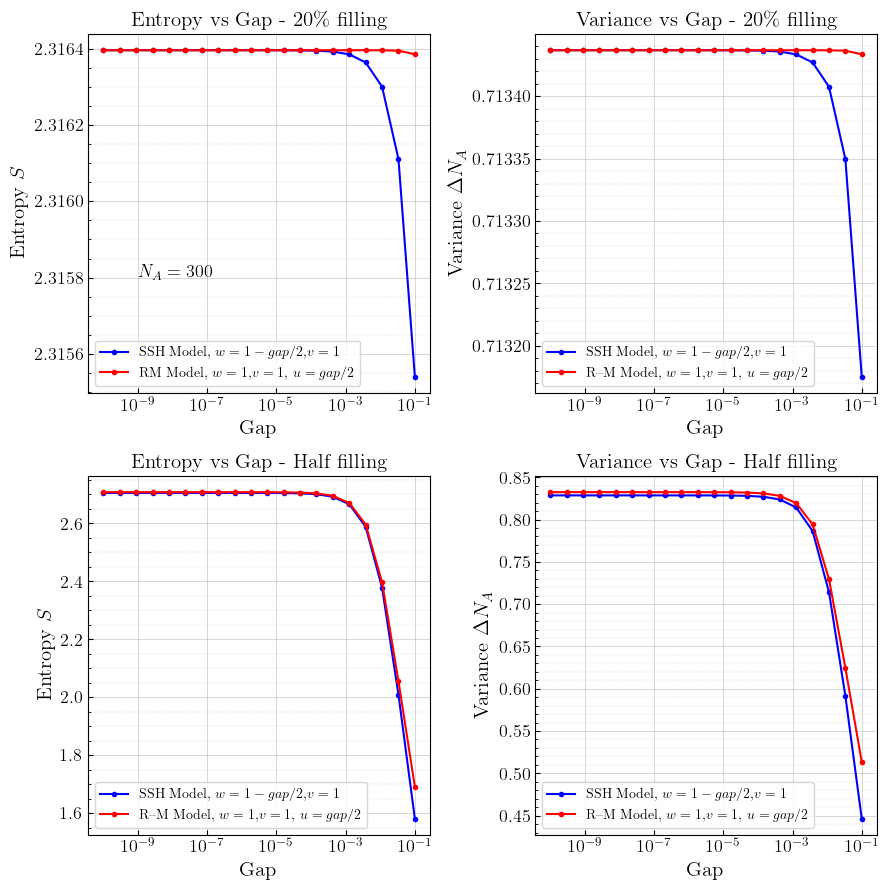

In [131]:
plot_ssh_and_rm_entropy_small_gaps()

In [34]:
def plot_ratio_entropy_variance_vs_gap_insulating_phase():
    # --- 1. Setup Data ---
    # Recreate the gap vector exactly as in your Julia code
    # Julia: 10 .^ range(log10(0.03), log10(0.3); length=15)
    gap = np.logspace(np.log10(0.03), np.log10(0.3), 15)

    # --- 2. Load Your Results ---
    # Replace 'PATH_TO_FILE' with your actual file paths.
    # Assuming standard space/tab separated files from Julia's readdlm/writedlm.
    # If you haven't saved them yet, you can manually paste the vectors here.

    try:
        # Example loading (Uncomment and adjust paths):
        Ratio_SSH = np.loadtxt(data_equilibrium_dir/"ratio_entropy_variance_vs_gap_ssh_400cells.txt")
        Ratio_RM  = np.loadtxt(data_equilibrium_dir/"ratio_entropy_variance_vs_gap_rm_400cells.txt")
    
        # If the file contains multiple columns (e.g., gap column 1, data column 2), use usecols=...
        # Ratio_SSH = np.loadtxt("...", usecols=0) 
        pass 
    except OSError:
        print("Could not find data files. Please check paths.")
        # For testing the plot script, here are dummy placeholders:
        Ratio_SSH = np.linspace(3.29, 3.0, 15) 
        Ratio_RM  = np.linspace(3.29, 2.8, 15)

    # --- 3. Plotting ---
    plt.figure(figsize=(8, 6))

    # Plot SSH
    plt.semilogx(gap, Ratio_SSH, 'o-', label='SSH Model', color='blue', linewidth=2, markersize=6)

    # Plot Rice-Mele
    plt.semilogx(gap, Ratio_RM, 's-', label='Rice-Mele Model', color='red', linewidth=2, markersize=6)

    # Add CFT Theoretical Limit line (pi^2 / 3)
    cft_limit = (np.pi**2) / 3
    plt.axhline(y=cft_limit, color='black', linestyle='--', linewidth=1.5, label=r'CFT Limit ($\pi^2/3 \approx 3.29$)')

    # add parameter fitted
    y_fit_ssh = (np.pi**2)/3 + 1.18303/np.log(400) - 3.56600/(np.log(400) **2)
    plt.axhline(y=y_fit_ssh, color='orange', linestyle='--', linewidth=1.5, label='SSH Finite Size Fit (N=400)')
    y_fit_rm = (np.pi**2)/3 + 0.00885/np.log(400) - 0.03824/(np.log(400) **2)
    plt.axhline(y=y_fit_rm, color='purple', linestyle='--', linewidth=1.5, label='Rice-Mele Finite Size Fit (N=400)')

    # --- 4. Styling ---
    plt.xlabel(r'Gap size ($\Delta$)', fontsize=12)
    plt.ylabel(r'Ratio $S / V_N$', fontsize=12)
    plt.title(r'Entanglement Ratio vs Gap (Insulating Phase)', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, which="both", ls="-", alpha=0.4) # Grid for log scale

    # Make axis ticks look nice
    plt.tick_params(axis='both', which='major', labelsize=11)

    plt.tight_layout()

    # Save and Show
    plt.savefig('ratio_SV_vs_gap_insulating_phase_top.png', dpi=300)
    plt.show()

    print("First 3 SSH values:", Ratio_SSH[:3])

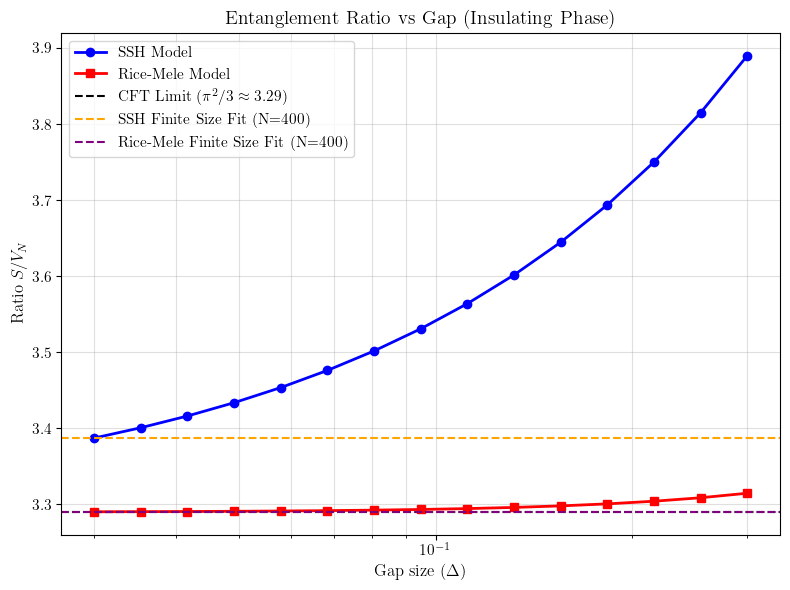

First 3 SSH values: [3.38723338 3.40082441 3.41625158]


In [35]:
plot_ratio_entropy_variance_vs_gap_insulating_phase()

In [137]:
def plot_ratio_entropy_variance_vs_gap_insulating_phase600():
    # --- 1. Setup Data ---
    # Recreate the gap vector exactly as in your Julia code
    # Julia: 10 .^ range(log10(0.03), log10(0.3); length=15)
    gap = np.concatenate([
    [0.005, 0.008, 0.01, 0.02],
    10 ** np.linspace(np.log10(0.02), np.log10(0.3), 10)[1:]
    ])

    # --- 2. Load Your Results ---
    # Replace 'PATH_TO_FILE' with your actual file paths.
    # Assuming standard space/tab separated files from Julia's readdlm/writedlm.
    # If you haven't saved them yet, you can manually paste the vectors here.

    try:
        # Example loading (Uncomment and adjust paths):
        Ratio_SSH = np.loadtxt(data_equilibrium_dir/"ratio_entropy_variance_vs_gap_ssh_600cells_newgap.txt")
        Ratio_RM  = np.loadtxt(data_equilibrium_dir/"ratio_entropy_variance_vs_gap_rm_600cells_newgap.txt")
    
        # If the file contains multiple columns (e.g., gap column 1, data column 2), use usecols=...
        # Ratio_SSH = np.loadtxt("...", usecols=0) 
        pass 
    except OSError:
        print("Could not find data files. Please check paths.")
        # For testing the plot script, here are dummy placeholders:
        Ratio_SSH = np.linspace(3.29, 3.0, 15) 
        Ratio_RM  = np.linspace(3.29, 2.8, 15)

    # --- 3. Plotting ---
    plt.figure(figsize=(8, 6))

    # Plot SSH
    plt.semilogx(gap, Ratio_SSH, 'o-', label='S-S-H Model', color='blue', linewidth=2, markersize=6)

    # Plot Rice-Mele
    plt.semilogx(gap, Ratio_RM, 's-', label='R-M Model', color='red', linewidth=2, markersize=6)

    ax = plt.gca()
    ax.set_axisbelow(True)

    ax.grid(True, which='major', axis='both', alpha=0.4)
    ax.grid(True, which='minor', axis='y', alpha=0.2)  # optional: keep minor horizontals
    ax.grid(False, which='minor', axis='x')             # remove minor verticals


    # THEN gradient-like conducting / critical region shading
    x_left = 0.005
    x_right = 0.01
    n_steps = 20

    xs = np.logspace(np.log10(x_left), np.log10(x_right), n_steps)

    for i in range(len(xs) - 1):
        alpha = 0.02 + 0.55 * np.exp(-3 * i / (len(xs) - 1))
        ax.axvspan(
            xs[i], xs[i + 1],
            color='#4C72B0',
            alpha=alpha,
            zorder=2,
            edgecolor='none',
            linewidth=0,
        )

    # Label inside shaded region
    ax.text(
        0.007
        , 3.6,      # adjust y slightly if needed
        'Criticality',
        fontsize=15,
        color='black',
        ha='center',
        va='center',
        bbox=dict(
            facecolor='white',
            edgecolor='black',
            boxstyle='round,pad=0.3',
            alpha=0.7
        )
    )
    ax.text(
        0.02, 3.6,      # adjust y slightly if needed
        'Insulating phase',
        fontsize=15,
        color='black',
        ha='center',
        va='center',
        bbox=dict(
            facecolor='white',
            edgecolor='black',
            boxstyle='round,pad=0.3',
            alpha=0.7
        )
    )



    # Add CFT Theoretical Limit line (pi^2 / 3)
    cft_limit = (np.pi**2) / 3
    plt.axhline(y=cft_limit, color='black', linestyle='--', linewidth=1.5, label=r'Univ. critical limit ($\pi^2/3 \approx 3.29$)')

    # add parameter fitted
    #y_fit_ssh = (np.pi**2)/3 + 1.18303/np.log(400) - 3.56600/(np.log(400) **2)
    #plt.axhline(y=y_fit_ssh, color='orange', linestyle='--', linewidth=1.5, label='SSH Finite Size Fit (N=400)')
    #y_fit_rm = (np.pi**2)/3 + 0.00885/np.log(400) - 0.03824/(np.log(400) **2)
    #plt.axhline(y=y_fit_rm, color='purple', linestyle='--', linewidth=1.5, label='Rice-Mele Finite Size Fit (N=400)')

    # --- 4. Styling ---
    plt.xlabel(r'Gap size ($\Delta / w$)', fontsize=15)
    plt.ylabel(r'Ratio $S / \Delta N_A^2$', fontsize=15)
    plt.legend(fontsize=14)

    # Make axis ticks look nice
    plt.tick_params(axis='both', which='major', labelsize=13)

    plt.tight_layout()

    # Save and Show
    plt.savefig('ratio_SV_vs_gap_insulating_phase_600_new_gap.svg', bbox_inches='tight')
    plt.show()

    print("First 3 SSH values:", Ratio_SSH[:3])

/tmp/ipykernel_114698/2539529278.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.axvspan(


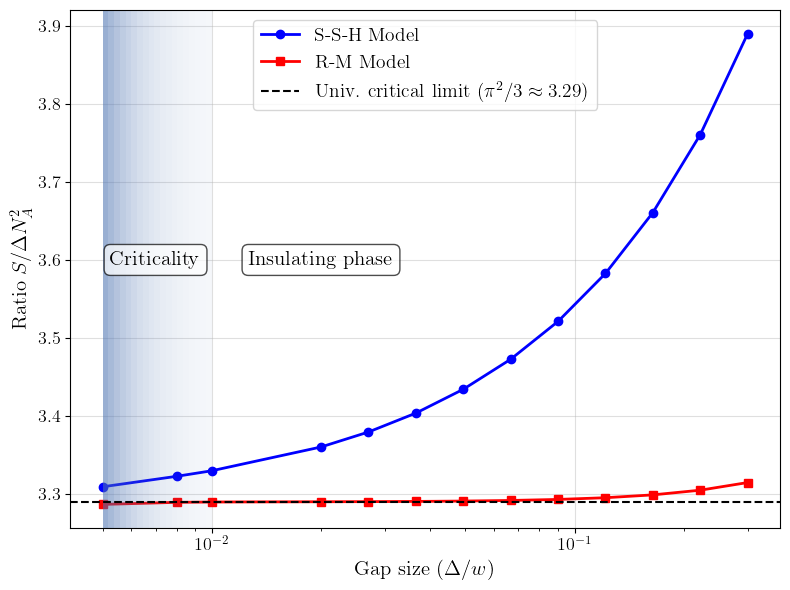

First 3 SSH values: [3.30925399 3.32267923 3.32979726]


In [138]:
plot_ratio_entropy_variance_vs_gap_insulating_phase600()

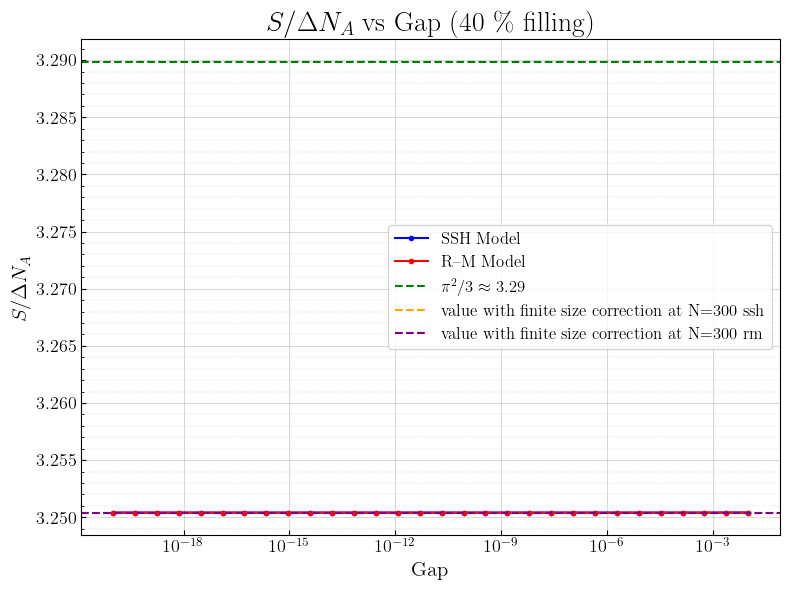

In [84]:
plot_ratio_entropy_variance_ssh_and_rm_40percentfilling()

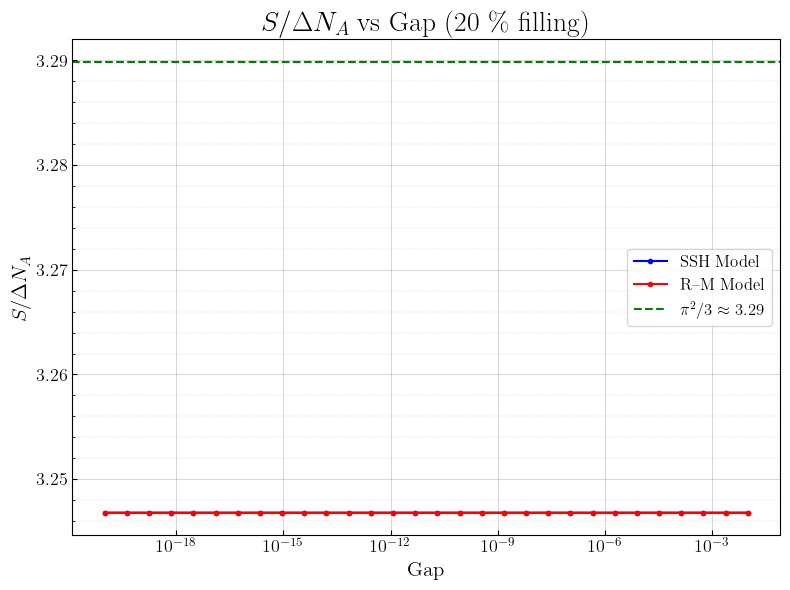

In [85]:
plot_ratio_entropy_variance_ssh_and_rm_20percentfilling()

In [59]:
def plot_another_ratio_entropy_variance_ssh_function_of_logN():
    N_cells = np.arange(200, 801, 40)
    Variance = np.loadtxt(data_equilibrium_dir/"variance_vs_Ncells_almostgapless_filling40percent.txt")
    Entropy = np.loadtxt(data_equilibrium_dir/"entropy_vs_Ncells_almostgapless_filling40percent.txt")
    ratio = Entropy / Variance
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.set_title(r"$S/\Delta N_{A}$ vs $N_A$ at equilibrium almost gapless (40% filling)", fontsize=20)
    ax.semilogx(N_cells, ratio, color="blue", marker='o', markersize=5)
    ax.set_xlabel(r"$N_A$", fontsize=15)
    ax.set_ylabel(r"$S/\Delta N_{A}$", fontsize=15)
    ax.tick_params(direction="in", labelsize=15)    
    plt.show()
    fig.savefig(plot_dir/"ratio_entropy_variance_vs_NA_almostgapless_filling40percent.pdf", bbox_inches='tight')

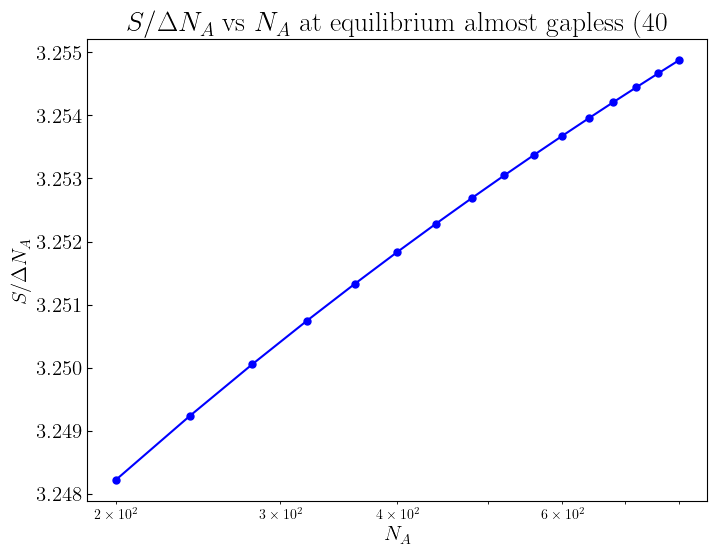

In [60]:
plot_another_ratio_entropy_variance_ssh_function_of_logN()

In [231]:
def comparison_data_entropy_vs_var_quench():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system, quench $t=0$", fontsize=20)

    direction1 = data_quench_dir/"entropy_200_cells_noflux.txt"
    direction2 = data_quench_dir/"variance_200_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 400,\,\, N_{A} = 200$", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_bigsize.pdf", bbox_inches = 'tight')
    

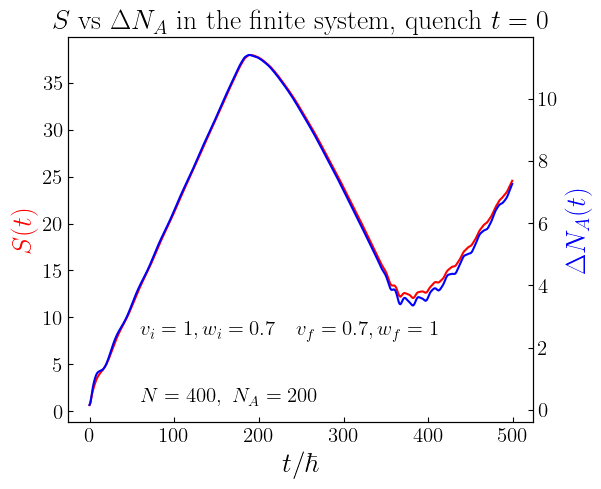

In [232]:
comparison_data_entropy_vs_var_quench()

In [233]:
def comparison_data_entropy_vs_var_quench_1():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system, quench $t=0$", fontsize=20)

    direction1 = data_quench_dir/"entropy_40_cells_noflux.txt"
    direction2 = data_quench_dir/"variance_40_cells_noflux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 80,\,\, N_{A} = 40$", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_midsize.pdf", bbox_inches = 'tight')
    

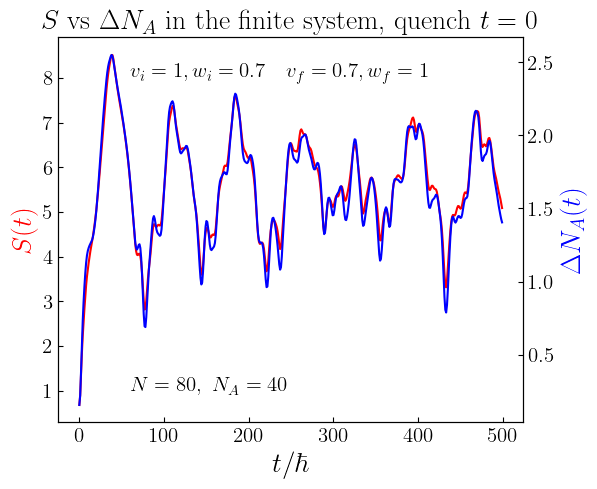

In [234]:
comparison_data_entropy_vs_var_quench_1()

In [235]:
def comparison_data_entropy_vs_var_quench_flux():

    fig = plt.figure(figsize = (6,5))
    spec = gridspec.GridSpec(ncols = 1, nrows = 1)
    ax1 = fig.add_subplot(spec[0,0])
    ax2 = ax1.twinx()
    ax1.set_title(r"$S$ vs $\Delta N_{A}$ in the finite system with flux, quench $t=0$", fontsize=20)
    direction1 = data_quench_dir/"entropy_40_cells_with_flux.txt"
    direction2 = data_quench_dir/"variance_40_cells_with_flux.txt"
    Entr = np.loadtxt(direction1)
    Var = np.loadtxt(direction2)

    #time = np.arange(0,108.57, 0.01)

    ax1.tick_params(direction = "in", labelsize = 15)
    ax2.tick_params(direction = "in", labelsize = 15)
    ax2.plot(Var, color = "blue")
    ax1.plot(Entr, color = "red")

    ax1.set_ylabel(r"$S(t)$", fontsize = 20, color = "red")
    ax2.set_ylabel(r"$\Delta N_{A}(t)$", fontsize = 20, color = "blue")
    ax1.set_xlabel(r"$t/\hbar$", fontsize = 20)

    ax1.text(60,1, r"$N = 80,\,\, N_{A} = 40, \phi \sim 0.0098 $", fontsize = 15)
    ax1.text(60, 8, r"$v_{i} = 1, w_{i} = 0.7 \quad v_{f} = 0.7, w_{f} = 1$", fontsize = 15)

    #ax1.set_ylim([0,1])
    #ax2.set_ylim([0,0.01])
    #ax1.set_xlim([0,100])

    fig.savefig(plot_dir/"entropy_vs_variance_with_flux_midsize.pdf", bbox_inches = 'tight')

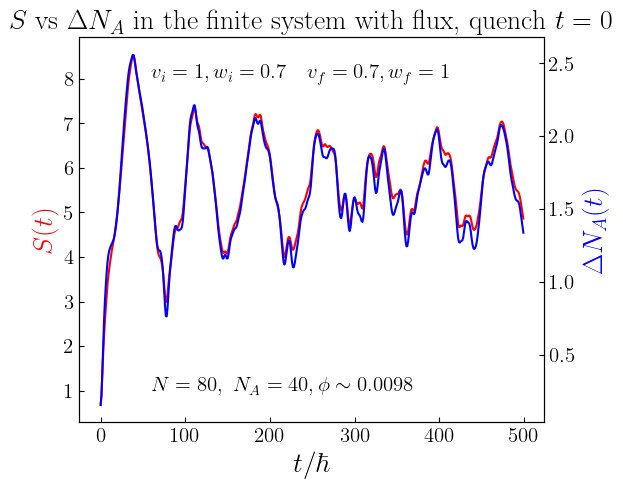

In [236]:
comparison_data_entropy_vs_var_quench_flux()